In [1]:
import numpy as np
import pandas as pd
import random
from scipy.linalg import norm
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys, argparse
import multiprocessing as mp
import missingno

# machine learning
import sklearn.cluster
import sklearn
import sklearn.preprocessing
import sklearn.decomposition
from sklearn.model_selection import train_test_split

###1. Load Data and Splot Data
from keras.models import Sequential 
from keras.layers.core import Dense, Activation
from keras.utils import np_utils

#--- custom libs
wdir = "/home/jim/molecules/src"
if wdir:
    sys.path.insert(0, wdir)
import sfuncs as sff
import funcs as ff

plt.style.use('dark_background')

Using TensorFlow backend.


# > Descriptores de la distribucion espacial de los átomos
# entre sí (en terminos de distancia y distribuciones angulares)

In [ ]:
!ls -lha ../data/postproc /mnt/data/postproc

In [3]:
#fname_desc = "../data/postproc/descriptors_sample.csv"
#fname_desc = "../data/postproc/descriptors_all.csv"
#fname_desc = "../data/postproc/struct_descriptors_i.csv"
fname_desc = "../data/postproc/struct_descriptors_ii.csv"
df = pd.read_csv(fname_desc, sep=';')

In [4]:
!wc -l ../data/postproc/struct_descriptors_i.csv

2358789 ../data/postproc/struct_descriptors_i.csv


In [5]:
df.shape

(2358788, 34)

In [6]:
df.columns

Index(['Unnamed: 0', 'molecule_name', 'atom_index', 'atom', 'desc_g2ang_00',
       'desc_g2ang_01', 'desc_g2ang_02', 'desc_g2ang_03', 'desc_g2ang_04',
       'desc_g2ang_05', 'desc_g2ang_06', 'desc_g2ang_07', 'desc_g2ang_08',
       'desc_g2ang_09', 'desc_g2ang_10', 'desc_g2ang_11', 'desc_g2ang_12',
       'desc_g2ang_13', 'desc_g2ang_14', 'desc_g2ang_15', 'desc_g2ang_16',
       'desc_g2ang_17', 'desc_g2ang_18', 'desc_g2ang_19', 'desc_g2rad_00',
       'desc_g2rad_01', 'desc_g2rad_02', 'desc_g2rad_03', 'desc_g2rad_04',
       'desc_g2rad_05', 'desc_g2rad_06', 'desc_g2rad_07', 'desc_g2rad_08',
       'desc_g2rad_09'],
      dtype='object')

In [7]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [8]:
df.head()

molecule_name  atom_index atom  desc_g2ang_00  desc_g2ang_01  \
0  dsgdb9nsd_000001           0    C       0.695603       0.015816   
1  dsgdb9nsd_000001           1    H       0.209967       0.000005   
2  dsgdb9nsd_000001           2    H       0.209968       0.000005   
3  dsgdb9nsd_000001           3    H       0.209971       0.000005   
4  dsgdb9nsd_000001           4    H       0.209970       0.000005   

   desc_g2ang_02  desc_g2ang_03  desc_g2ang_04  desc_g2ang_05  desc_g2ang_06  \
0       2.634598       0.348029       4.218433       1.026835       5.924430   
1       1.598941       0.000595       4.126687       0.003586       8.838402   
2       1.598943       0.000595       4.126689       0.003586       8.838405   
3       1.598940       0.000595       4.126686       0.003586       8.838433   
4       1.598938       0.000595       4.126684       0.003586       8.838431   

   ...  desc_g2rad_00  desc_g2rad_01  desc_g2rad_02  desc_g2rad_03  \
0  ...       2.761545       2.656870       0.066674       3.399233   
1  ...       0.748390       2.204438       1.870981       1.461728   
2  ...       0.748392       2.204433       1.870983       1.461728   
3  ...       0.748396       2.204380       1.871024       1.461715   
4  ...       0.748394       2.204382       1.871024       1.461714   

   desc_g2rad_04  desc_g2rad_05  desc_g2rad_06  desc_g2rad_07  desc_g2rad_08  \
0       3.348309       0.793716       0.000435        0.00001   1.065209e-08   
1       3.039904       2.566884       0.192174        0.00329   1.842923e-05   
2       3.039901       2.566885       0.192175        0.00329   1.842934e-05   
3       3.039872       2.566901       0.192186        0.00329   1.843097e-05   
4       3.039873       2.566901       0.192186        0.00329   1.843097e-05   

   desc_g2rad_09  
0   1.128894e-13  
1   1.865740e-09  
2   1.865755e-09  
3   1.865976e-09  
4   1.865975e-09  

[5 rows x 33 columns]

# > Mulliken charges

In [9]:
df_mulliken = pd.read_csv("../data/mulliken_charges.csv", sep=',')

In [10]:
df_mulliken.head(10)

molecule_name  atom_index  mulliken_charge
0  dsgdb9nsd_000001           0        -0.535689
1  dsgdb9nsd_000001           1         0.133921
2  dsgdb9nsd_000001           2         0.133922
3  dsgdb9nsd_000001           3         0.133923
4  dsgdb9nsd_000001           4         0.133923
5  dsgdb9nsd_000002           0        -0.707143
6  dsgdb9nsd_000002           1         0.235712
7  dsgdb9nsd_000002           2         0.235712
8  dsgdb9nsd_000002           3         0.235720
9  dsgdb9nsd_000003           0        -0.589706

In [11]:
df_struct = pd.read_csv("../data/structures.csv", sep=',')
df_struct.head()

molecule_name  atom_index atom         x         y         z
0  dsgdb9nsd_000001           0    C -0.012698  1.085804  0.008001
1  dsgdb9nsd_000001           1    H  0.002150 -0.006031  0.001976
2  dsgdb9nsd_000001           2    H  1.011731  1.463751  0.000277
3  dsgdb9nsd_000001           3    H -0.540815  1.447527 -0.876644
4  dsgdb9nsd_000001           4    H -0.523814  1.437933  0.906397

In [12]:
#%pdb

In [13]:
df_mulliken.columns.values

array(['molecule_name', 'atom_index', 'mulliken_charge'], dtype=object)

In [14]:
"molecule_name" in df.columns, "molecule_name" in df_mulliken.columns

(True, True)

In [15]:
df_merge = pd.merge(df, df_mulliken, 
    how="left", 
    on=["molecule_name", "atom_index"])
#df_merge = pd.merge(df_merge, df_struct[["molecule_name", "atom_index", "atom"]], 
#    how='left', 
#    on=["molecule_name", "atom_index"])

In [16]:
del df_mulliken, df_struct, df

In [17]:
(~df_merge["mulliken_charge"].isna()).nonzero()[0].size / df_merge.shape[0]

/home/jim/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  """Entry point for launching an IPython kernel.


0.6501601670010192

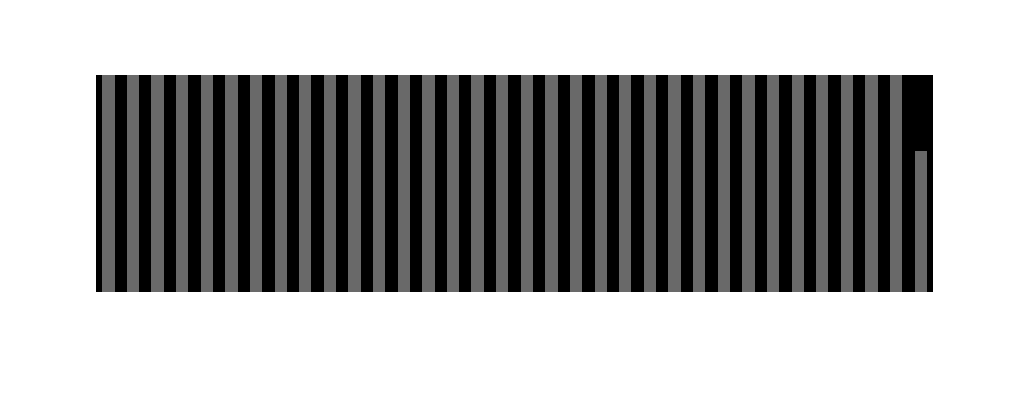

In [18]:
missingno.bar(df_merge, figsize=(15,4))

In [19]:
df_merge.dropna(axis=0, how='any', subset=["mulliken_charge",], inplace=True)

In [20]:
df_merge.reset_index(drop=True, inplace=True)
df_merge.head(15)

molecule_name  atom_index atom  desc_g2ang_00  desc_g2ang_01  \
0   dsgdb9nsd_000001           0    C       0.695603   1.581561e-02   
1   dsgdb9nsd_000001           1    H       0.209967   5.496340e-06   
2   dsgdb9nsd_000001           2    H       0.209968   5.496301e-06   
3   dsgdb9nsd_000001           3    H       0.209971   5.495667e-06   
4   dsgdb9nsd_000001           4    H       0.209970   5.495664e-06   
5   dsgdb9nsd_000002           0    N       0.721502   1.576502e-02   
6   dsgdb9nsd_000002           1    H       0.301446   1.209427e-05   
7   dsgdb9nsd_000002           2    H       0.301449   1.209471e-05   
8   dsgdb9nsd_000002           3    H       0.301408   1.207862e-05   
9   dsgdb9nsd_000003           0    O       0.601195   8.398919e-03   
10  dsgdb9nsd_000003           1    H       0.354804   7.453169e-06   
11  dsgdb9nsd_000003           2    H       0.354804   7.453169e-06   
12  dsgdb9nsd_000005           0    C       0.326166   2.062174e-03   
13  dsgdb9nsd_000005           1    N       0.134044   2.036516e-65   
14  dsgdb9nsd_000005           2    H       0.196412   2.675694e-66   

    desc_g2ang_02  desc_g2ang_03  desc_g2ang_04  desc_g2ang_05  desc_g2ang_06  \
0        2.634598   3.480289e-01       4.218433   1.026835e+00       5.924430   
1        1.598941   5.947887e-04       4.126687   3.586068e-03       8.838402   
2        1.598943   5.947848e-04       4.126689   3.586046e-03       8.838405   
3        1.598940   5.947270e-04       4.126686   3.585721e-03       8.838433   
4        1.598938   5.947271e-04       4.126684   3.585721e-03       8.838431   
5        2.296316   2.133659e-01       3.457790   5.310381e-01       4.644222   
6        1.706454   4.871674e-04       3.657829   2.041182e-03       6.652191   
7        1.706461   4.871832e-04       3.657834   2.041247e-03       6.652187   
8        1.706323   4.865343e-04       3.657746   2.038498e-03       6.652387   
9        1.690190   8.384457e-02       2.432288   1.875914e-01       3.158590   
10       1.436650   7.440335e-05       2.586119   1.664679e-04       4.077884   
11       1.436650   7.440335e-05       2.586119   1.664679e-04       4.077884   
12       1.263552   1.247931e-01       2.034989   5.246184e-01       2.862560   
13       0.720364   1.094443e-64       1.622600   2.465201e-64       3.380640   
14       0.832099   1.641448e-64       1.728185   6.977398e-64       3.454182   

    ...  desc_g2rad_01  desc_g2rad_02  desc_g2rad_03  desc_g2rad_04  \
0   ...       2.656870       0.066674       3.399233       3.348309   
1   ...       2.204438       1.870981       1.461728       3.039904   
2   ...       2.204433       1.870983       1.461728       3.039901   
3   ...       2.204380       1.871024       1.461715       3.039872   
4   ...       2.204382       1.871024       1.461714       3.039873   
5   ...       1.627125       0.026866       2.716282       2.325662   
6   ...       2.089838       0.750421       1.562946       2.513882   
7   ...       2.089839       0.750414       1.562951       2.513882   
8   ...       2.089608       0.750678       1.562775       2.513776   
9   ...       0.907754       0.011010       1.876034       1.448618   
10  ...       1.351101       0.243943       1.364504       1.650080   
11  ...       1.351101       0.243943       1.364504       1.650080   
12  ...       1.379453       0.040096       1.667537       1.695982   
13  ...       0.816862       0.861808       0.835643       1.189050   
14  ...       0.683881       0.848853       0.908116       1.127446   

    desc_g2rad_05  desc_g2rad_06  desc_g2rad_07  desc_g2rad_08  desc_g2rad_09  \
0        0.793716       0.000435       0.000010   1.065209e-08   1.128894e-13   
1        2.566884       0.192174       0.003290   1.842923e-05   1.865740e-09   
2        2.566885       0.192175       0.003290   1.842934e-05   1.865755e-09   
3        2.566901       0.192186       0.003290   1.843097e-05   1.865976e-09   
4        2.566901       0.19218

In [21]:
df_merge.shape

(1533590, 34)

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(
    df_merge.drop(["molecule_name", "atom_index", "mulliken_charge", "atom"], axis=1),
    df_merge[["mulliken_charge",]],
    train_size=0.75
    )

/home/jim/anaconda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [23]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((1150192, 30), (1150192, 1), (383398, 30), (383398, 1))

In [ ]:
X_train.describe()

desc_g2ang_00  desc_g2ang_01  desc_g2ang_02  desc_g2ang_03  \
count   1.150192e+06   1.150192e+06   1.150192e+06   1.150192e+06   
mean    2.281284e-01   9.349259e-04   1.390193e+00   4.365525e-02   
std     1.078933e-01   2.005828e-03   4.199914e-01   6.381922e-02   
min     3.614522e-02   0.000000e+00   4.817015e-01   0.000000e+00   
25%     1.794665e-01   1.681361e-06   1.109381e+00   5.129448e-04   
50%     1.956034e-01   3.895950e-06   1.362412e+00   1.302677e-03   
75%     2.586108e-01   7.351370e-04   1.674714e+00   8.095352e-02   
max     7.235689e-01   1.665381e-02   2.739025e+00   3.082220e-01   

       desc_g2ang_04  desc_g2ang_05  desc_g2ang_06  desc_g2ang_07  \
count   1.150192e+06   1.150192e+06   1.150192e+06   1.150192e+06   
mean    4.120187e+00   2.487618e-01   1.573286e+01   1.473701e+00   
std     1.124991e+00   3.015425e-01   4.260601e+00   1.588638e+00   
min     1.299040e+00   0.000000e+00   2.862560e+00   0.000000e+00   
25%     3.447561e+00   8.608779e-03   1.300216e+01   1.359902e-01   
50%     3.926762e+00   2.701969e-02   1.539827e+01   4.526501e-01   
75%     4.912330e+00   5.324636e-01   1.823453e+01   3.116718e+00   
max     8.719474e+00   1.086670e+00   3.939575e+01   6.308272e+00   

       desc_g2ang_08  desc_g2ang_09  ...  desc_g2rad_00  desc_g2rad_01  \
count   1.150192e+06   1.150192e+06  ...   1.150192e+06   1.150192e+06   
mean    3.249957e+01   3.554424e+00  ...   9.309618e-01   2.078113e+00   
std     8.403466e+00   3.709935e+00  ...   4.292773e-01   9.942693e-01   
min     3.226210e+00   0.000000e+00  ...   2.332285e-01   6.460050e-01   
25%     2.692117e+01   4.560438e-01  ...   7.027787e-01   1.297878e+00   
50%     3.245679e+01   1.524325e+00  ...   7.280863e-01   1.828015e+00   
75%     3.808110e+01   6.711145e+00  ...   1.091759e+00   3.004831e+00   
max     7.842507e+01   2.018182e+01  ...   2.534401e+00   4.558863e+00   

       desc_g2rad_02  desc_g2rad_03  desc_g2rad_04  desc_g2rad_05  \
count   1.150192e+06   1.150192e+06   1.150192e+06   1.150192e+06   
mean    3.373559e+00   1.619582e+00   3.262678e+00   5.077423e+00   
std     1.398374e+00   6.394580e-01   1.212258e+00   1.795751e+00   
min     1.100965e-02   6.494763e-01   9.576270e-01   2.584880e-01   
25%     2.534430e+00   1.143019e+00   2.428356e+00   3.940707e+00   
50%     3.144408e+00   1.331310e+00   2.887737e+00   4.798469e+00   
75%     4.036347e+00   2.135356e+00   4.190135e+00   6.050147e+00   
max     1.113779e+01   3.246803e+00   7.760832e+00   1.423772e+01   

       desc_g2rad_06  desc_g2rad_07  desc_g2rad_08  desc_g2rad_09  
count   1.150192e+06   1.150192e+06   1.150192e+06   1.150192e+06  
mean    3.948835e+00   3.750238e+00   2.731745e+00   1.405086e+00  
std     1.587229e+00   1.326247e+00   1.138056e+00   9.106490e-01  
min     4.273227e-05   1.329430e-06   9.976678e-10   6.919481e-15  
25%     2.835750e+00   2.791431e+00   1.921633e+00   6.548762e-01  
50%     3.899323e+00   3.719521e+00   2.706201e+00   1.357288e+00  
75%     4.988354e+00   4.658238e+00   3.510948e+00   2.032551e+00  
max     1.387621e+01   9.958488e+00   8.521602e+00   5.985755e+00  

[8 rows x 30 columns]

In [ ]:
scl_mean = X_train.mean(axis=0)
X_train_cent = X_train - scl_mean
scl_norm = np.max(X_train_cent.abs().max())

X_train_norm = pd.DataFrame(X_train_cent / scl_norm, dtype=np.float32)

In [ ]:
X_train_norm.describe()

desc_g2ang_00  desc_g2ang_01  desc_g2ang_02  desc_g2ang_03  \
count   1.150192e+06   1.150192e+06   1.150192e+06   1.150192e+06   
mean   -1.098716e-11  -3.857371e-12   2.658745e-11   6.963372e-11   
std     1.743786e-03   3.246082e-05   6.787755e-03   1.030072e-03   
min    -3.103606e-03  -1.511404e-05  -1.468670e-02  -7.057322e-04   
25%    -7.866695e-04  -1.508686e-05  -4.539619e-03  -6.974399e-04   
50%    -5.258003e-04  -1.505106e-05  -4.491102e-04  -6.846731e-04   
75%     4.927789e-04  -3.229792e-06   4.599580e-03   6.029649e-04   
max     8.009306e-03   2.541119e-04   2.180526e-02   4.276995e-03   

       desc_g2ang_04  desc_g2ang_05  desc_g2ang_06  desc_g2ang_07  \
count   1.150192e+06   1.150192e+06   1.150192e+06   1.150192e+06   
mean    3.050455e-10  -3.660898e-10   1.091587e-09  -3.936335e-10   
std     1.817959e-02   4.872679e-03   6.885229e-02   2.567756e-02   
min    -4.560674e-02  -4.021490e-03  -2.080616e-01  -2.382390e-02   
25%    -1.087369e-02  -3.882321e-03  -4.414458e-02  -2.162548e-02   
50%    -3.126908e-03  -3.584689e-03  -5.408849e-03  -1.650635e-02   
75%     1.280582e-02   4.586333e-03   4.044213e-02   2.656106e-02   
max     7.435223e-02   1.354565e-02   3.825351e-01   7.815582e-02   

       desc_g2ang_08  desc_g2ang_09  ...  desc_g2rad_00  desc_g2rad_01  \
count   1.150192e+06   1.150192e+06  ...   1.150192e+06   1.150192e+06   
mean   -9.247024e-10  -1.012310e-09  ...   1.644283e-10  -2.496540e-12   
std     1.358035e-01   5.996758e-02  ...   6.940046e-03   1.607137e-02   
min    -4.732341e-01  -5.746094e-02  ...  -1.127958e-02  -2.315151e-02   
25%    -9.018062e-02  -5.008852e-02  ...  -3.688815e-03  -1.261331e-02   
50%    -6.916224e-04  -3.281865e-02  ...  -3.279691e-03  -4.043104e-03   
75%     9.023122e-02   5.103164e-02  ...   2.599449e-03   1.498134e-02   
max     7.424330e-01   2.687990e-01  ...   2.592124e-02   4.010388e-02   

       desc_g2rad_02  desc_g2rad_03  desc_g2rad_04  desc_g2rad_05  \
count   1.150192e+06   1.150192e+06   1.150192e+06   1.150192e+06   
mean    1.130605e-10   3.549973e-12  -6.042327e-10  -5.635585e-11   
std     2.259862e-02   1.034043e-02   1.959637e-02   2.902131e-02   
min    -5.435907e-02  -1.568275e-02  -3.726352e-02  -7.790305e-02   
25%    -1.356538e-02  -7.704122e-03  -1.348768e-02  -1.837618e-02   
50%    -3.704452e-03  -4.660214e-03  -6.061305e-03  -4.509577e-03   
75%     1.071466e-02   8.338020e-03   1.499330e-02   1.572509e-02   
max     1.255167e-01   2.630571e-02   7.271729e-02   1.480856e-01   

       desc_g2rad_06  desc_g2rad_07  desc_g2rad_08  desc_g2rad_09  
count   1.150192e+06   1.150192e+06   1.150192e+06   1.150192e+06  
mean    3.319619e-10   4.021881e-10   6.105068e-10  -1.468246e-10  
std     2.565071e-02   2.143430e-02   1.839228e-02   1.471825e-02  
min    -6.383630e-02  -6.062645e-02  -4.416148e-02  -2.271466e-02  
25%    -1.799417e-02  -1.550011e-02  -1.309630e-02  -1.212791e-02  
50%    -8.004175e-04  -4.965767e-04  -4.129432e-04  -7.727014e-04  
75%     1.680490e-02   1.467875e-02   1.259662e-02   1.014362e-02  
max     1.604863e-01   1.003628e-01   9.359901e-02   7.405123e-02  

[8 rows x 30 columns]

In [ ]:
# let's try w a "random forest"
# Inspired from:
# https://www.kaggle.com/borisdee/predicting-mulliken-charges-with-acsf-descriptors/notebook
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error

# > Extra Trees "Random Forest"

In [ ]:
N_train = X_train.shape[0]
min_samples_split = 0.001
max_features = 0.8

print(" -> min sample for node-splitting: %d" % int(min_samples_split*N_train))
print(" -> fraction of features (subspace) used to split: %f" % max_features)

 -> min sample for node-splitting: 1150
 -> fraction of features (subspace) used to split: 0.800000


In [ ]:
# train
#X_train_input = X_train_norm.sample(frac=0.80, random_state=2019)
#Y_train_input = Y_train.loc[X_train_input.index]
# cross validation
#X_train_cv    = X_train_norm.drop(X_train_input.index)
#Y_train_cv    = Y_train.loc[X_train_cv.index]

In [ ]:
# Extra Tree
reg = ExtraTreesRegressor(
    n_estimators = 100,
    criterion = "mse",
    max_depth = 32,
    n_jobs = 8,
    verbose = 2
    )

reg.fit(X_train_norm, Y_train)

/home/jim/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100


[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:  7.3min


building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74

[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed: 24.5min finished


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=32,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=8,
          oob_score=False, random_state=None, verbose=2, warm_start=False)

# > Save model

In [ ]:
import pickle, joblib

In [ ]:
%%time
fname_out = "/mnt/data/postproc/model_ExtraTrees_allTypes.pkl"
joblib.dump(reg, open(fname_out, 'wb'), compress=('zlib', 3))

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/postproc/model_ExtraTrees_allTypes.pkl'

# > Feature importance

 --> plotting features importances...


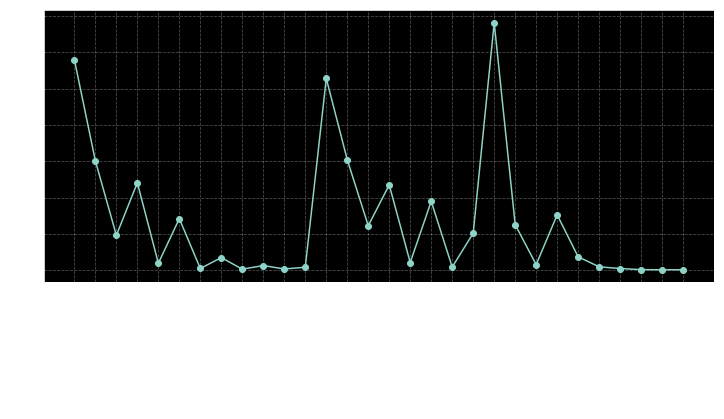

In [ ]:
print(" --> plotting features importances...")
plt.figure(figsize=(12,5))
plt.plot(X_train.columns, reg.feature_importances_, '-o')
plt.tick_params(rotation=70, labelsize=16)
plt.grid(ls='--', alpha=0.3)

In [ ]:
#pred_train = reg.predict(X_train)
#pred_cv = reg.predict(X_cv)
Y_test_pred = reg.predict((X_test - scl_mean) / scl_norm)
Y_test_pred

In [ ]:
# guardamos test set para lugo testear el modelo "guardado en disco"
#with h5py.File("", "w") as fo:
joblib.dump(
    {
        "params/scl_mean" : scl_mean,
        "params/scl_norm" : scl_norm,
        "X_test" : X_test,
        "Y_test" : Y_test,
        "Y_pred" : Y_test_pred,
    },
    open("/mnt/data/postproc/train_test_sets.pkl", "wb"),
    compress = ('zlib', 3),
    )
print(" -> DONE.")

In [ ]:
atom_types   = df_merge.loc[X_test.index.values,"atom"].unique()
atom_colors = ["orange", "r", "m", "y", "b"]
colors = dict([ (nm,catom) for (nm,catom) in zip(atom_types, atom_colors) ])

atom_colors_train = df_merge.loc[X_test.index.values,"atom"].apply(lambda nm: colors[nm]).values

In [ ]:
atom_types

In [ ]:
print(" --> plotting...")
plt.figure(figsize=(16,10))
plt.scatter(Y_test, Y_test_pred, s=1, c=atom_colors_train)
plt.grid(ls='--', alpha=0.3)
plt.title("Mulliken charges", fontsize=18)
plt.xlabel("test", fontsize=18); plt.ylabel("pred", fontsize=18);
plt.tick_params(labelsize=16)

print(" > MAE =", mean_absolute_error(Y_test, Y_test_pred))

In [ ]:
import h5py
fo = h5py.File("../data/postproc/predictions.h5", "w")
fo["Y_test"] = Y_test
fo["Y_test_pred"] = Y_test_pred
fo.close()

In [ ]:
!ls -lha ../data/postproc/*.h5 /mnt/data/postproc

In [ ]:
import importlib
importlib.reload(ff)
print(" > import ok.")

In [ ]:
fig, ax = ff.make_hist2d(
    Y_test.iloc[:,0].values, 
    Y_test_pred,
    bins = (128, 128),
    range = [(-0.7, 0.7), (-0.7, 0.7)],
    cmap = 'viridis',
    figsize = (18, 13),
    cb_fontsize = 16,
    )
ax.set_xlabel("test", fontsize=18)
ax.set_ylabel("pred", fontsize=18)
ax.set_title("Mulliken charge", fontsize=18)
ax.grid(ls='--', alpha=0.3)
ax.tick_params(labelsize=16)

In [ ]:
fig

# >> H predictions

In [ ]:
df_merge["atom"][:4]

In [ ]:
atom_type_o = "C"  #"F" #"N" #"C"  #"H"
cc = (df_merge["atom"] == atom_type_o).values
Xo_train, Xo_test, Yo_train, Yo_test = train_test_split(
    df_merge.iloc[cc,:].drop(["molecule_name", "atom_index", "mulliken_charge", "atom"], axis=1),
    df_merge.iloc[cc,:][["mulliken_charge",]],
    train_size=0.75
    )

In [ ]:
scl_mean_o = Xo_train.mean(axis=0)
Xo_train_cent = Xo_train - scl_mean_o
scl_norm_o = np.max(Xo_train_cent.abs().max())

Xo_train_norm = pd.DataFrame(Xo_train_cent / scl_norm_o, dtype=np.float32)

In [ ]:
# Extra Tree
reg = ExtraTreesRegressor(
    n_estimators = 100,
    criterion = "mse",
    max_depth = 20, 
    n_jobs = 8,
    verbose = 2,
    )

reg.fit(Xo_train_norm, Yo_train)

In [ ]:
Yo_pred = reg.predict((Xo_test - scl_mean_o) / scl_norm_o)
#Yo_pred

In [ ]:
print(" --> plotting...")
plt.figure(figsize=(16,10))
plt.scatter(Yo_test, Yo_pred, s=1,)
plt.grid(ls='--', alpha=0.3)
plt.title("Mulliken charges", fontsize=18)
plt.xlabel("test", fontsize=18); plt.ylabel("pred", fontsize=18);
plt.tick_params(labelsize=16)

print(" > MAE =", mean_absolute_error(Yo_test, Yo_pred))

In [ ]:
interrupt here :D

# "F"

In [ ]:
print(" --> plotting...")
plt.figure(figsize=(16,10))
plt.scatter(Yo_test, Yo_pred, s=1,)
plt.grid(ls='--', alpha=0.3)
plt.title("Mulliken charges", fontsize=18)
plt.xlabel("test", fontsize=18); plt.ylabel("pred", fontsize=18);
plt.tick_params(labelsize=16)

print(" > MAE =", mean_absolute_error(Yo_test, Yo_pred))

# "N"

In [ ]:
print(" --> plotting...")
plt.figure(figsize=(16,10))
plt.scatter(Yo_test, Yo_pred, s=1,)
plt.grid(ls='--', alpha=0.3)
plt.title("Mulliken charges", fontsize=18)
plt.xlabel("test", fontsize=18); plt.ylabel("pred", fontsize=18);
plt.tick_params(labelsize=16)

print(" > MAE =", mean_absolute_error(Yo_test, Yo_pred))

# "C"

In [ ]:
print(" --> plotting...")
plt.figure(figsize=(16,10))
plt.scatter(Yo_test, Yo_pred, s=1,)
plt.grid(ls='--', alpha=0.3)
plt.title("Mulliken charges", fontsize=18)
plt.xlabel("test", fontsize=18); plt.ylabel("pred", fontsize=18);
plt.tick_params(labelsize=16)

print(" > MAE =", mean_absolute_error(Yo_test, Yo_pred))

# "H"

In [ ]:
print(" --> plotting...")
plt.figure(figsize=(16,10))
plt.scatter(Yo_test, Yo_pred, s=1,)
plt.grid(ls='--', alpha=0.3)
plt.title("Mulliken charges", fontsize=18)
plt.xlabel("test", fontsize=18); plt.ylabel("pred", fontsize=18);
plt.tick_params(labelsize=16)

print(" > MAE =", mean_absolute_error(Yo_test, Yo_pred))